In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import probplot
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer

warnings.filterwarnings('ignore')

In [2]:
# read data

df = pd.read_csv('weatherAUS.csv', low_memory=False)
pd.set_option('display.max_columns', None)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
# converting into date format

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Date'] = pd.to_datetime(df['Date']).dt.day

In [6]:
# to get season from month


def seasons(s):
    if (s == 12 or s == 1 or s == 2):
        return 'Summer'
    elif (s == 3 or s == 4 or s == 5):
        return 'Autumn'

    elif (s == 6 or s == 7 or s == 8):
        return 'Winter'

    else:
        return 'Spring'


df['Season'] = df['Month'].apply(seasons)

In [7]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month
count,145460.000000,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,145460.000000,145460.000000
mean,15.712258,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,2012.769751,6.399615
std,8.794789,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,2.537684,3.427262
min,1.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,2007.000000,1.000000
25%,8.000000,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,2011.000000,3.000000
50%,16.000000,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,2013.000000,6.000000
75%,23.000000,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,2015.000000,9.000000
max,31.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,2017.000000,12.000000


In [8]:
for cols in df.columns:
    if df[cols].dtype == 'O' and cols not in 'Date':
        print(df[cols].value_counts())
        print('-------------------------------------------------------')

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


<AxesSubplot:xlabel='Season', ylabel='count'>

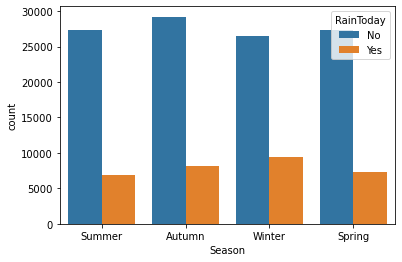

In [9]:
# Winter has more rain as compared to other seasons

sns.countplot(x=df['Season'], hue=df['RainToday'])

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

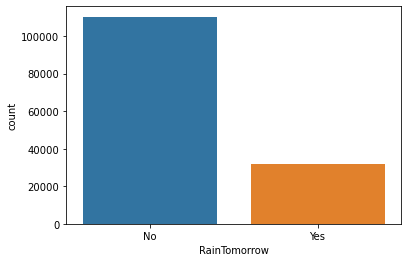

In [10]:
# imbalanced

sns.countplot(df['RainTomorrow'])

In [11]:
# seperating data based on dtype

date = ['Date', 'Year', 'Month']
categorical = [
    feature for feature in df.columns
    if df[feature].dtype == 'O' and feature not in date
]
numerical = [
    feature for feature in df.columns
    if df[feature].dtype != 'O' and feature not in date
]

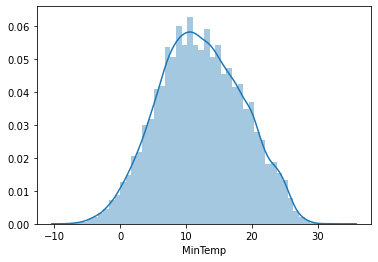

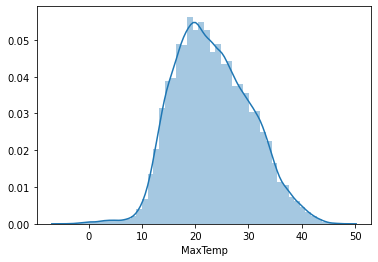

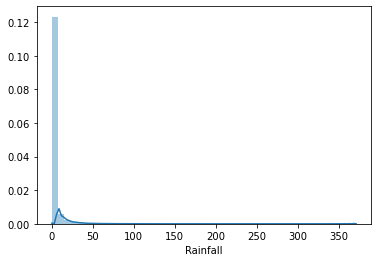

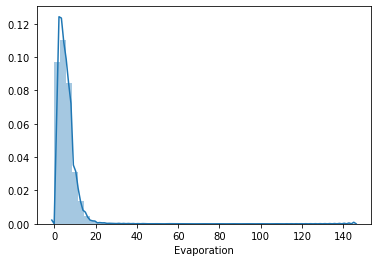

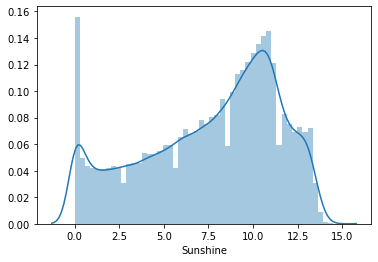

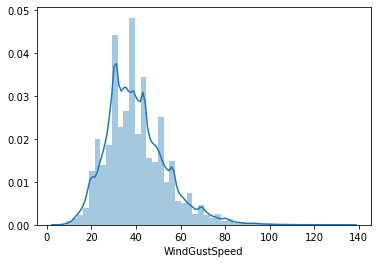

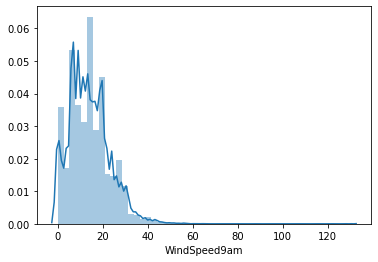

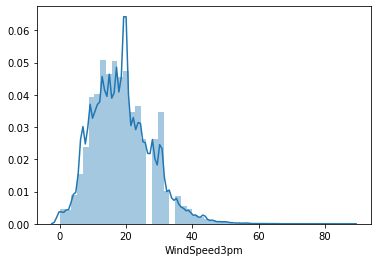

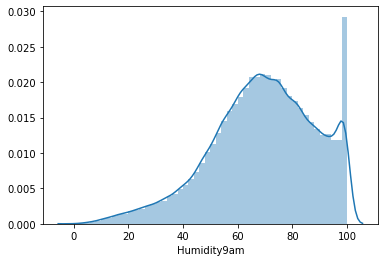

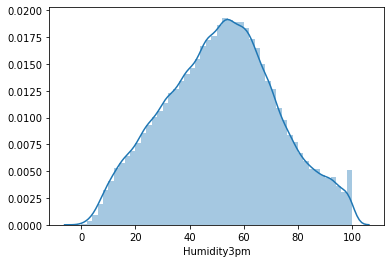

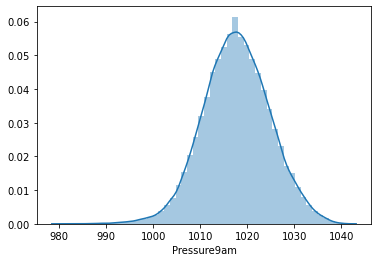

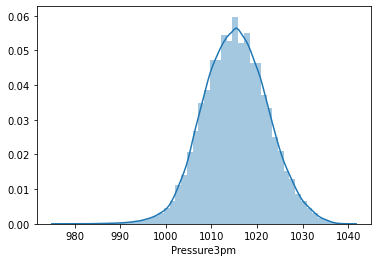

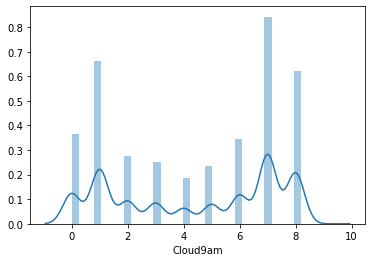

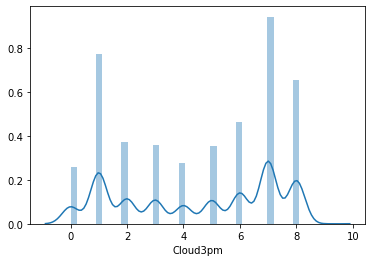

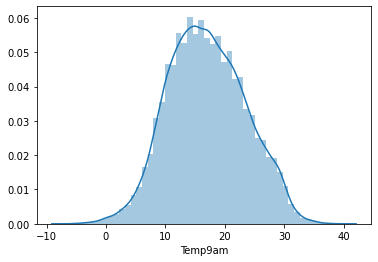

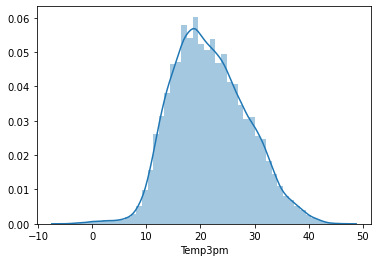

In [12]:
# distribution plot of numerical

for feature in numerical:
    df = df.copy()
    sns.distplot(df[feature], kde=True)
    plt.show()

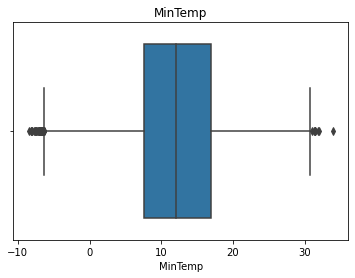

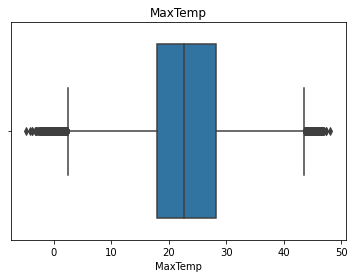

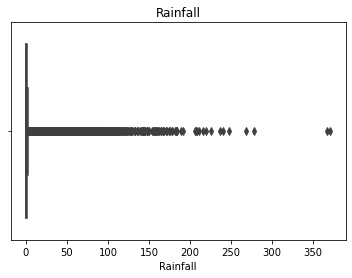

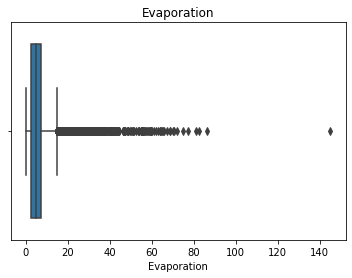

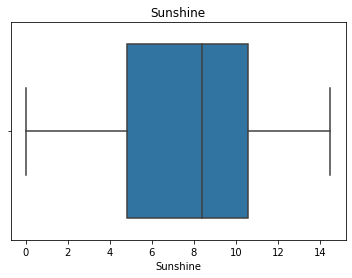

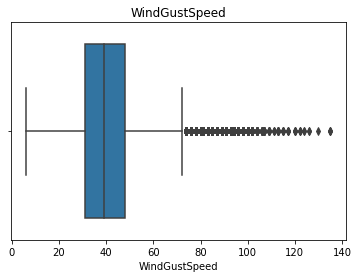

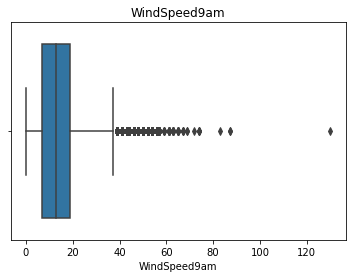

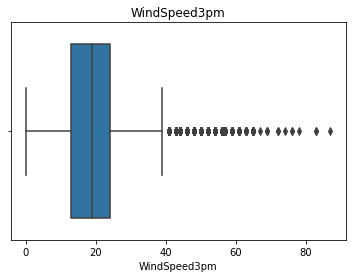

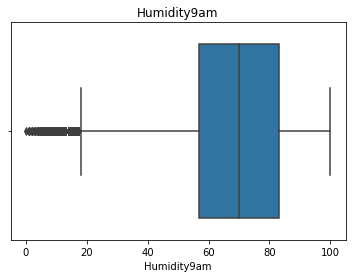

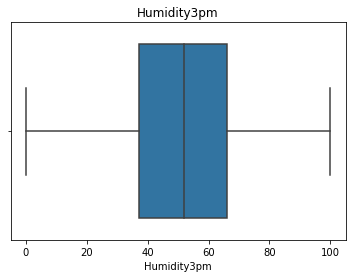

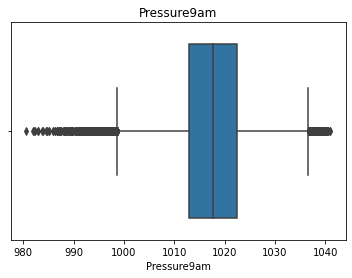

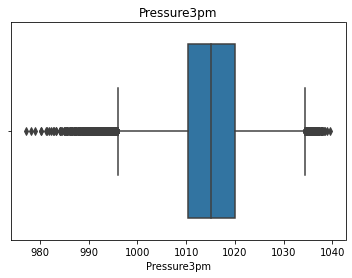

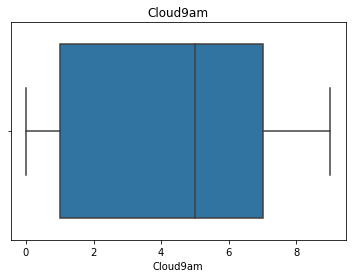

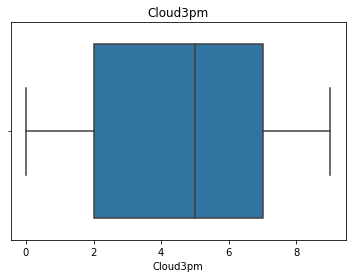

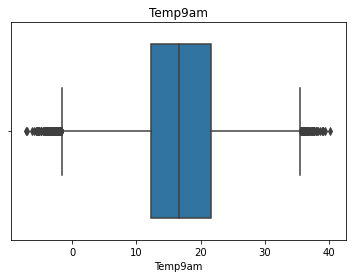

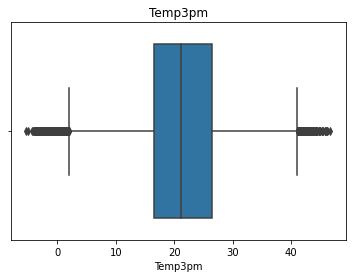

In [13]:
# boxplot of numerical

for feature in numerical:
    df = df.copy()
    sns.boxplot(x=df[feature])
    plt.title(feature)
    plt.show()

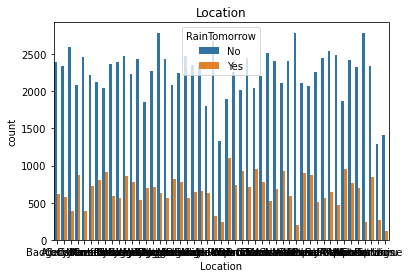

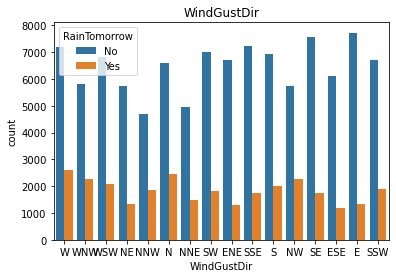

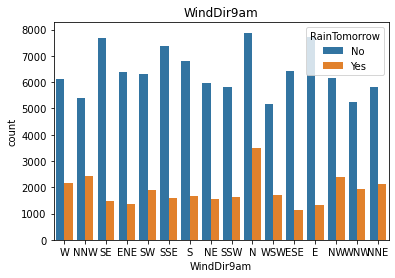

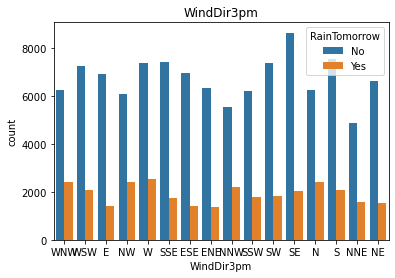

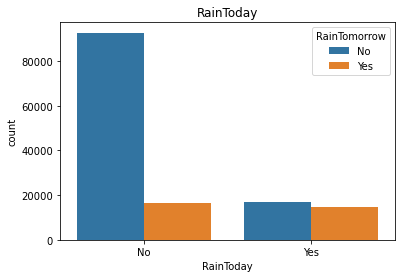

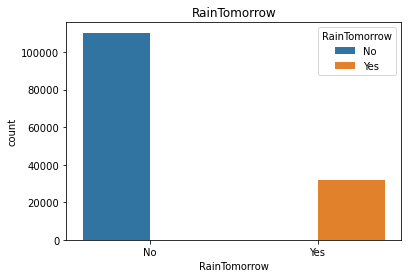

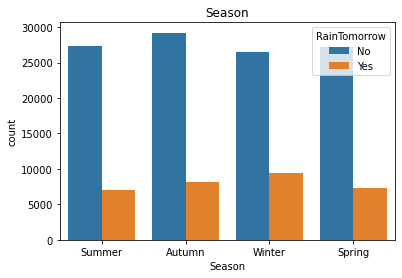

In [14]:
# countplot of categorical

for feature in categorical:
    df = df.copy()
    sns.countplot(df[feature], hue=df['RainTomorrow'])
    plt.title(feature)
    plt.show()

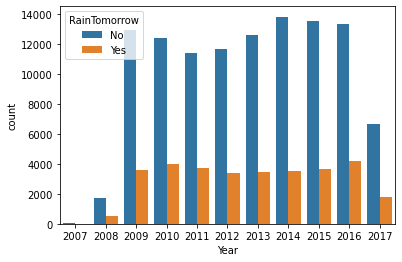

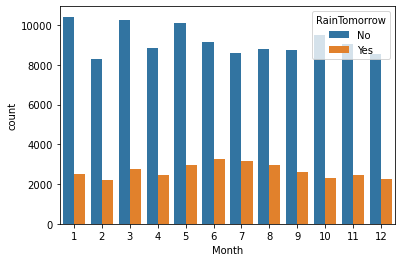

In [15]:
# countplot of date related features

for feature in date:
    if feature != 'Date':
        sns.countplot(df[feature], hue=df['RainTomorrow'])
        plt.show()

In [16]:
#iqr for outlier removal

for feature in numerical:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower = df[feature].quantile(0.25) - (IQR * 1.5)
    upper = df[feature].quantile(0.75) + (IQR * 1.5)
    print(feature, lower, upper)
    df.loc[df[feature] >= upper, feature] = upper
    df.loc[df[feature] <= lower, feature] = lower

MinTemp -6.35 30.849999999999998
MaxTemp 2.4499999999999975 43.65
Rainfall -1.2000000000000002 2.0
Evaporation -4.600000000000001 14.600000000000001
Sunshine -3.8999999999999995 19.299999999999997
WindGustSpeed 5.5 73.5
WindSpeed9am -11.0 37.0
WindSpeed3pm -3.5 40.5
Humidity9am 18.0 122.0
Humidity3pm -6.5 109.5
Pressure9am 998.65 1036.65
Pressure3pm 996.0 1034.4
Cloud9am -8.0 16.0
Cloud3pm -5.5 14.5
Temp9am -1.6500000000000004 35.550000000000004
Temp3pm 1.9000000000000057 41.099999999999994


MinTemp


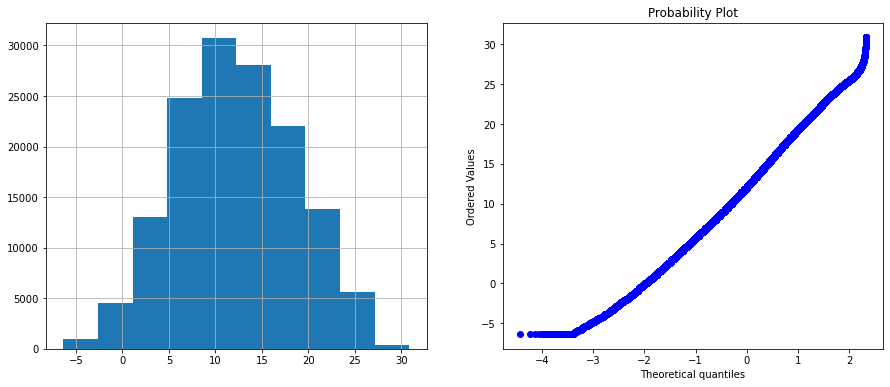

MaxTemp


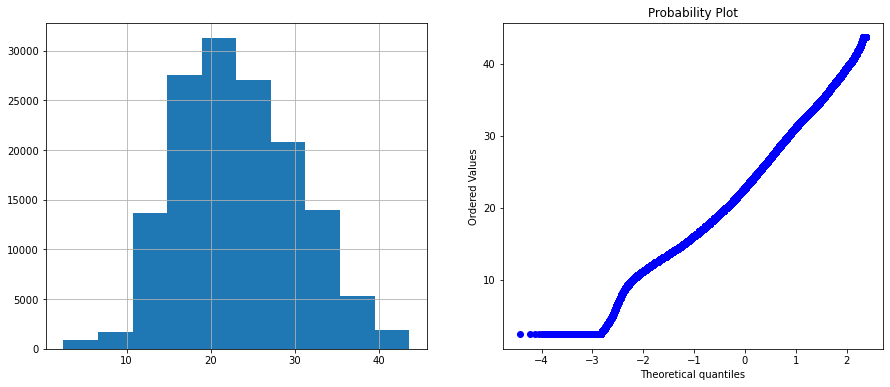

Rainfall


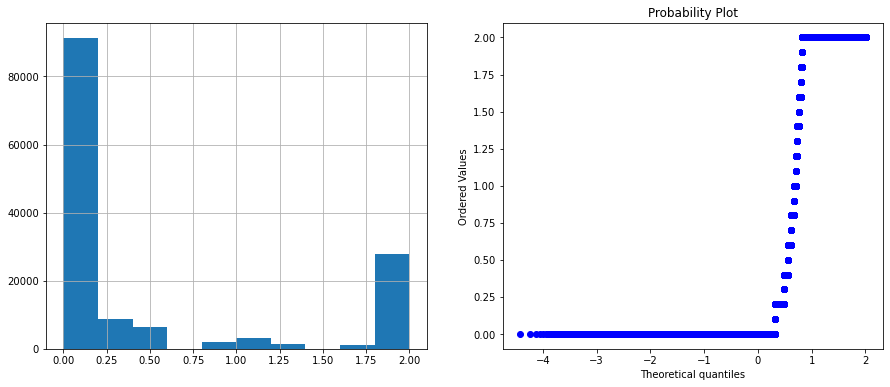

Evaporation


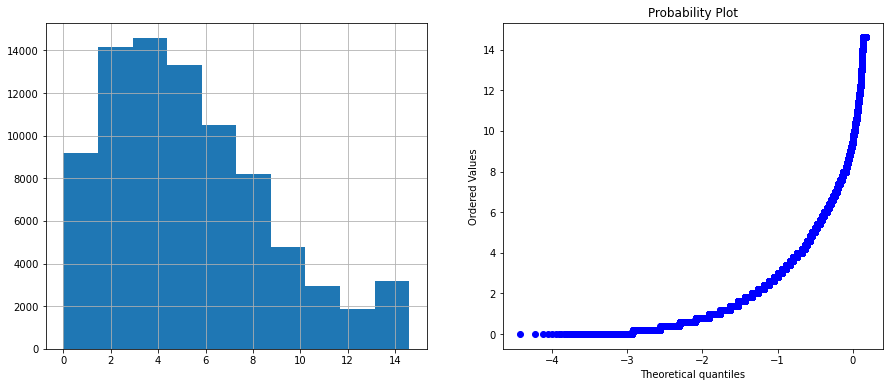

Sunshine


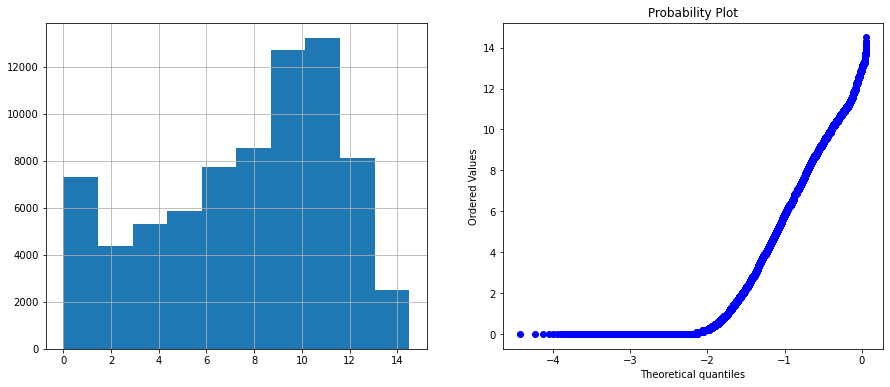

WindGustSpeed


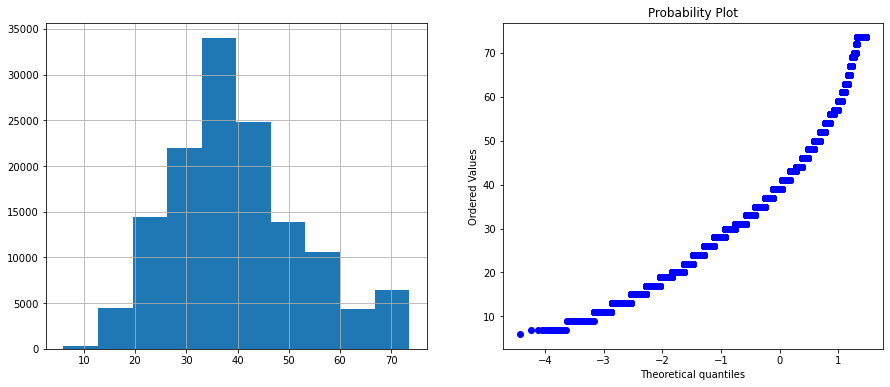

WindSpeed9am


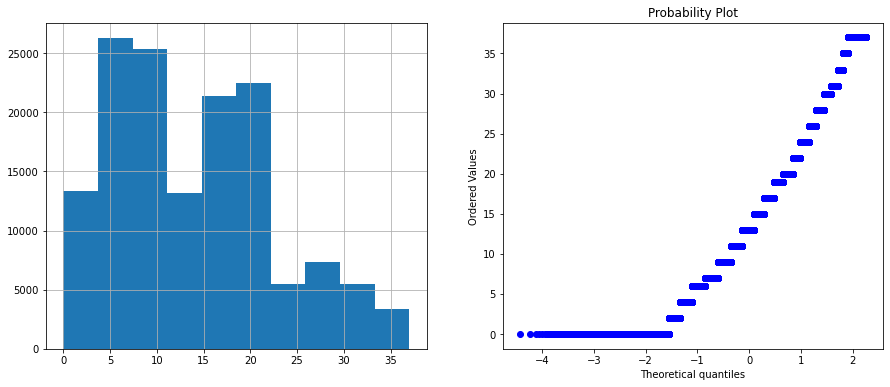

WindSpeed3pm


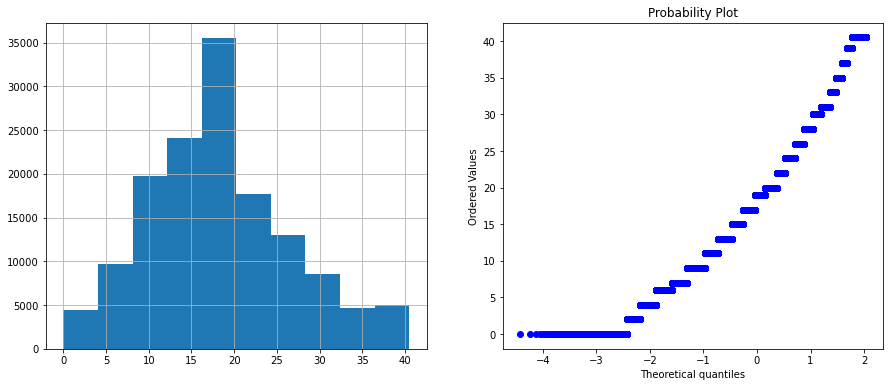

Humidity9am


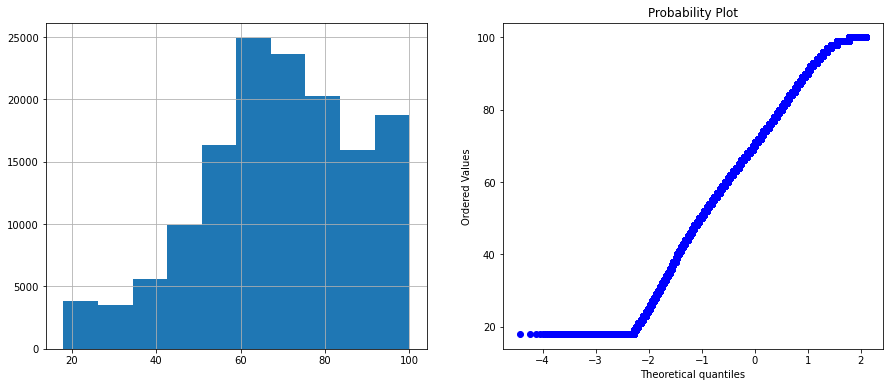

Humidity3pm


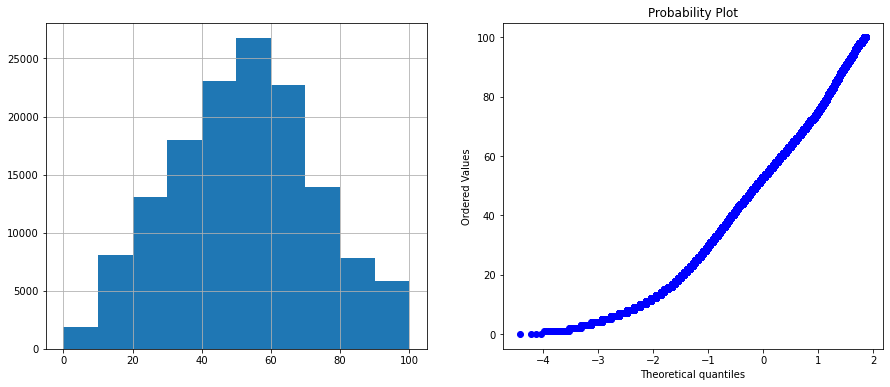

Pressure9am


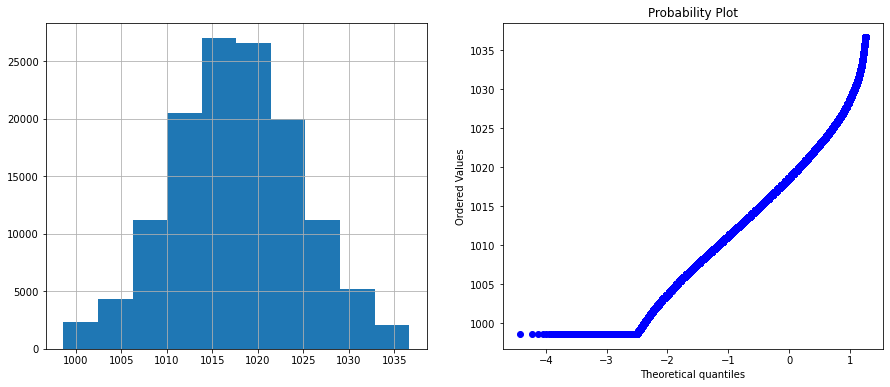

Pressure3pm


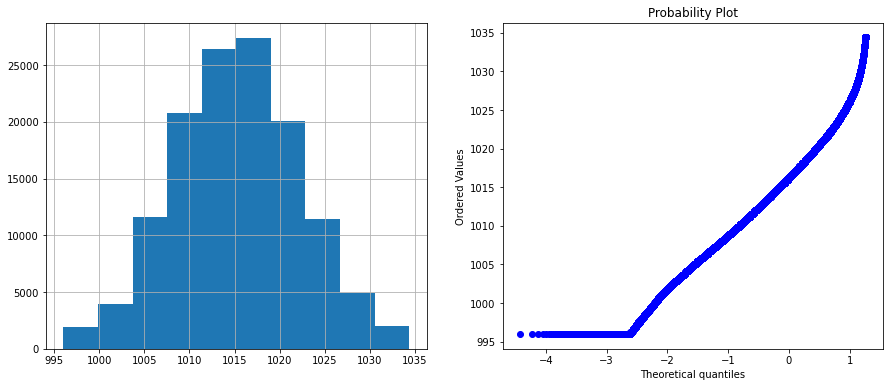

Cloud9am


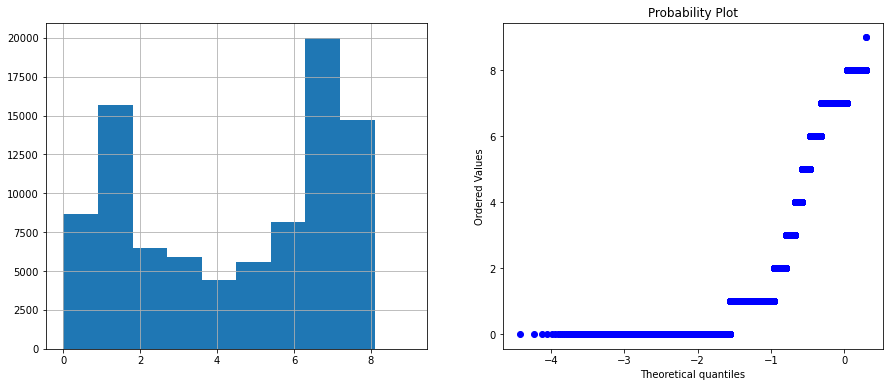

Cloud3pm


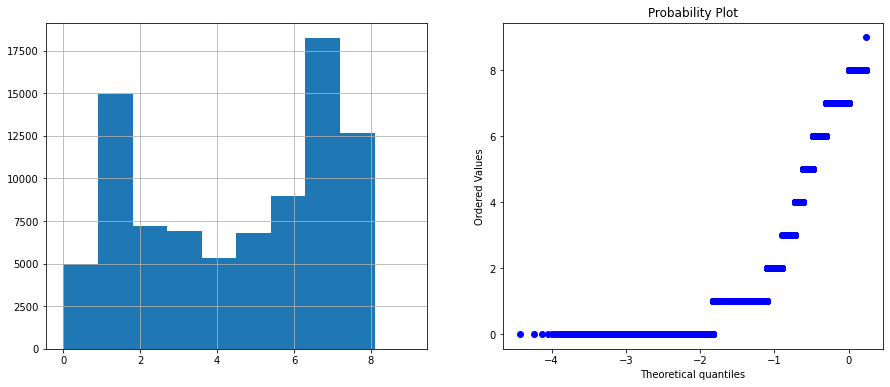

Temp9am


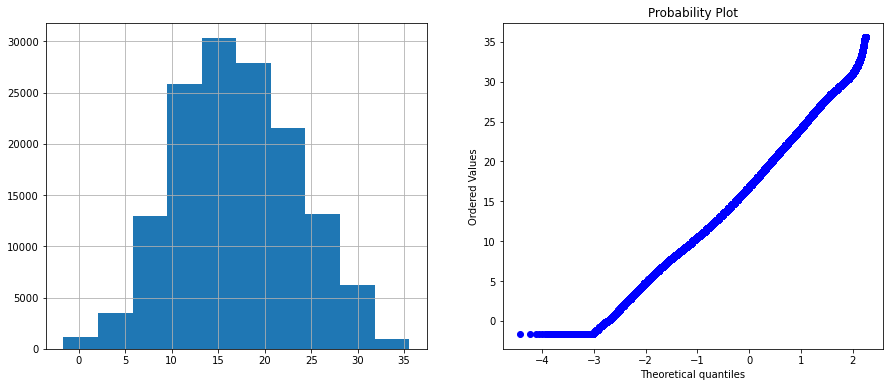

Temp3pm


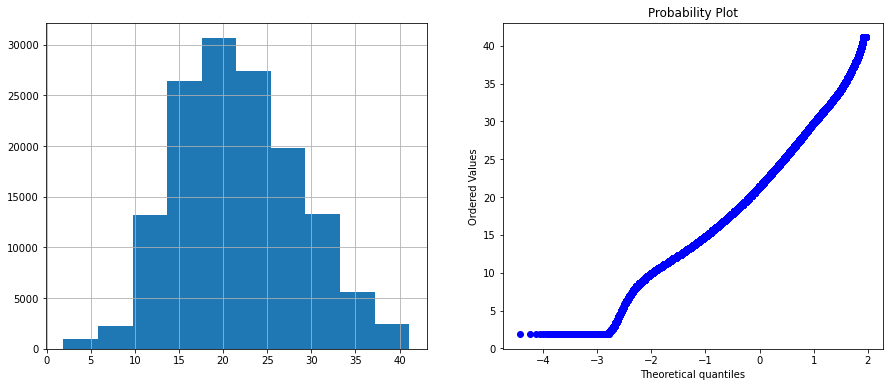

In [17]:
# qq plot of numerical features
for feature in numerical:
    print(feature)
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    probplot(df[feature], dist="norm", plot=plt)
    plt.show()

In [18]:
df1 = df.groupby([
    "Location"
])["RainTomorrow"].value_counts().sort_values(ascending=False).unstack()
df1['Yes'].sort_values(ascending=False)

Location
Portland            1095
Cairns               950
Walpole              949
Dartmoor             922
MountGambier         920
NorfolkIsland        919
Albany               902
Witchcliffe          879
CoffsHarbour         869
Sydney               865
Darwin               852
MountGinini          819
NorahHead            808
Ballarat             781
GoldCoast            775
SydneyAirport        774
Hobart               761
Watsonia             738
Newcastle            731
Wollongong           713
Brisbane             709
Williamtown          700
Launceston           699
Adelaide             688
MelbourneAirport     653
Perth                645
Sale                 643
Melbourne            636
Canberra             629
Albury               618
Penrith              595
Nuriootpa            592
BadgerysCreek        583
Tuggeranong          568
PerthAirport         567
Bendigo              562
Richmond             560
WaggaWagga           536
Townsville           519
PearceRAAF      

In [19]:
# encoding

location = {
    'Portland': 1,
    'Cairns': 2,
    'Walpole': 3,
    'Dartmoor': 4,
    'MountGambier': 5,
    'NorfolkIsland': 6,
    'Albany': 7,
    'Witchcliffe': 8,
    'CoffsHarbour': 9,
    'Sydney': 10,
    'Darwin': 11,
    'MountGinini': 12,
    'NorahHead': 13,
    'Ballarat': 14,
    'GoldCoast': 15,
    'SydneyAirport': 16,
    'Hobart': 17,
    'Watsonia': 18,
    'Newcastle': 19,
    'Wollongong': 20,
    'Brisbane': 21,
    'Williamtown': 22,
    'Launceston': 23,
    'Adelaide': 24,
    'MelbourneAirport': 25,
    'Perth': 26,
    'Sale': 27,
    'Melbourne': 28,
    'Canberra': 29,
    'Albury': 30,
    'Penrith': 31,
    'Nuriootpa': 32,
    'BadgerysCreek': 33,
    'Tuggeranong': 34,
    'PerthAirport': 35,
    'Bendigo': 36,
    'Richmond': 37,
    'WaggaWagga': 38,
    'Townsville': 39,
    'PearceRAAF': 40,
    'SalmonGums': 41,
    'Moree': 42,
    'Cobar': 43,
    'Mildura': 44,
    'Katherine': 45,
    'AliceSprings': 46,
    'Nhil': 47,
    'Woomera': 48,
    'Uluru': 49
}
df["Location"] = df["Location"].map(location)

windgustdir = {
    'NNW': 0,
    'NW': 1,
    'WNW': 2,
    'N': 3,
    'W': 4,
    'WSW': 5,
    'NNE': 6,
    'S': 7,
    'SSW': 8,
    'SW': 9,
    'SSE': 10,
    'NE': 11,
    'SE': 12,
    'ESE': 13,
    'ENE': 14,
    'E': 15
}
winddir9am = {
    'NNW': 0,
    'NW': 1,
    'WNW': 2,
    'N': 3,
    'W': 4,
    'WSW': 5,
    'NNE': 6,
    'S': 7,
    'SSW': 8,
    'SW': 9,
    'SSE': 10,
    'NE': 11,
    'SE': 12,
    'ESE': 13,
    'ENE': 14,
    'E': 15
}
winddir3pm = {
    'NNW': 0,
    'NW': 1,
    'WNW': 2,
    'N': 3,
    'W': 4,
    'WSW': 5,
    'NNE': 6,
    'S': 7,
    'SSW': 8,
    'SW': 9,
    'SSE': 10,
    'NE': 11,
    'SE': 12,
    'ESE': 13,
    'ENE': 14,
    'E': 15
}
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})

df['Season'] = df['Season'].map({
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3,
    'Spring': 4
})

In [20]:
# imputing using iterative imputer

cols = [
    'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
    'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
    'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
    'RainToday', 'RainTomorrow', 'Year', 'Month', 'Season'
]
impute = IterativeImputer()
imp = impute.fit_transform(df[cols])

df2 = pd.DataFrame(imp, columns=cols)

In [21]:
# rounding the values of 2 features

df2['RainToday'] = np.round(df2['RainToday'])
df2['RainTomorrow'] = np.round(df2['RainTomorrow'])

df2['RainToday'] = df2['RainToday'].astype('int64')
df2['RainTomorrow'] = df2['RainTomorrow'].astype('int64')

In [22]:
df2

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Season
0,1.0,30.0,13.4,22.900000,0.6,6.493419,7.549565,4.000000,44.000000,4.0,2.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.274353,16.9,21.8,0,0,2008.0,12.0,1.0
1,2.0,30.0,7.4,25.100000,0.0,6.557349,11.643941,2.000000,44.000000,0.0,5.0,4.0,22.0,44.0,25.0,1010.6,1007.8,1.941410,2.637223,17.2,24.3,0,0,2008.0,12.0,1.0
2,3.0,30.0,12.9,25.700000,0.0,8.922124,12.365480,5.000000,46.000000,4.0,5.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.103591,2.000000,21.0,23.2,0,0,2008.0,12.0,1.0
3,4.0,30.0,9.2,28.000000,0.0,7.254362,12.675248,11.000000,24.000000,12.0,15.0,11.0,9.0,45.0,16.0,1017.6,1012.8,1.218062,1.698868,18.1,26.5,0,0,2008.0,12.0,1.0
4,5.0,30.0,17.5,32.300000,1.0,7.079074,6.529833,4.000000,41.000000,14.0,1.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008.0,12.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21.0,49.0,2.8,23.400000,0.0,5.826071,10.455246,15.000000,31.000000,12.0,14.0,13.0,11.0,51.0,24.0,1024.6,1020.3,1.509480,2.057882,10.1,22.4,0,0,2017.0,6.0,3.0
145456,22.0,49.0,3.6,25.300000,0.0,5.039491,9.960972,0.000000,22.000000,12.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,1.938709,2.596119,10.9,24.5,0,0,2017.0,6.0,3.0
145457,23.0,49.0,5.4,26.900000,0.0,6.070340,9.548692,3.000000,37.000000,12.0,2.0,9.0,9.0,53.0,24.0,1021.0,1016.8,2.246382,2.998410,12.5,26.1,0,0,2017.0,6.0,3.0
145458,24.0,49.0,7.8,27.000000,0.0,6.712732,10.061661,12.000000,28.000000,10.0,3.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0,2017.0,6.0,3.0


<AxesSubplot:>

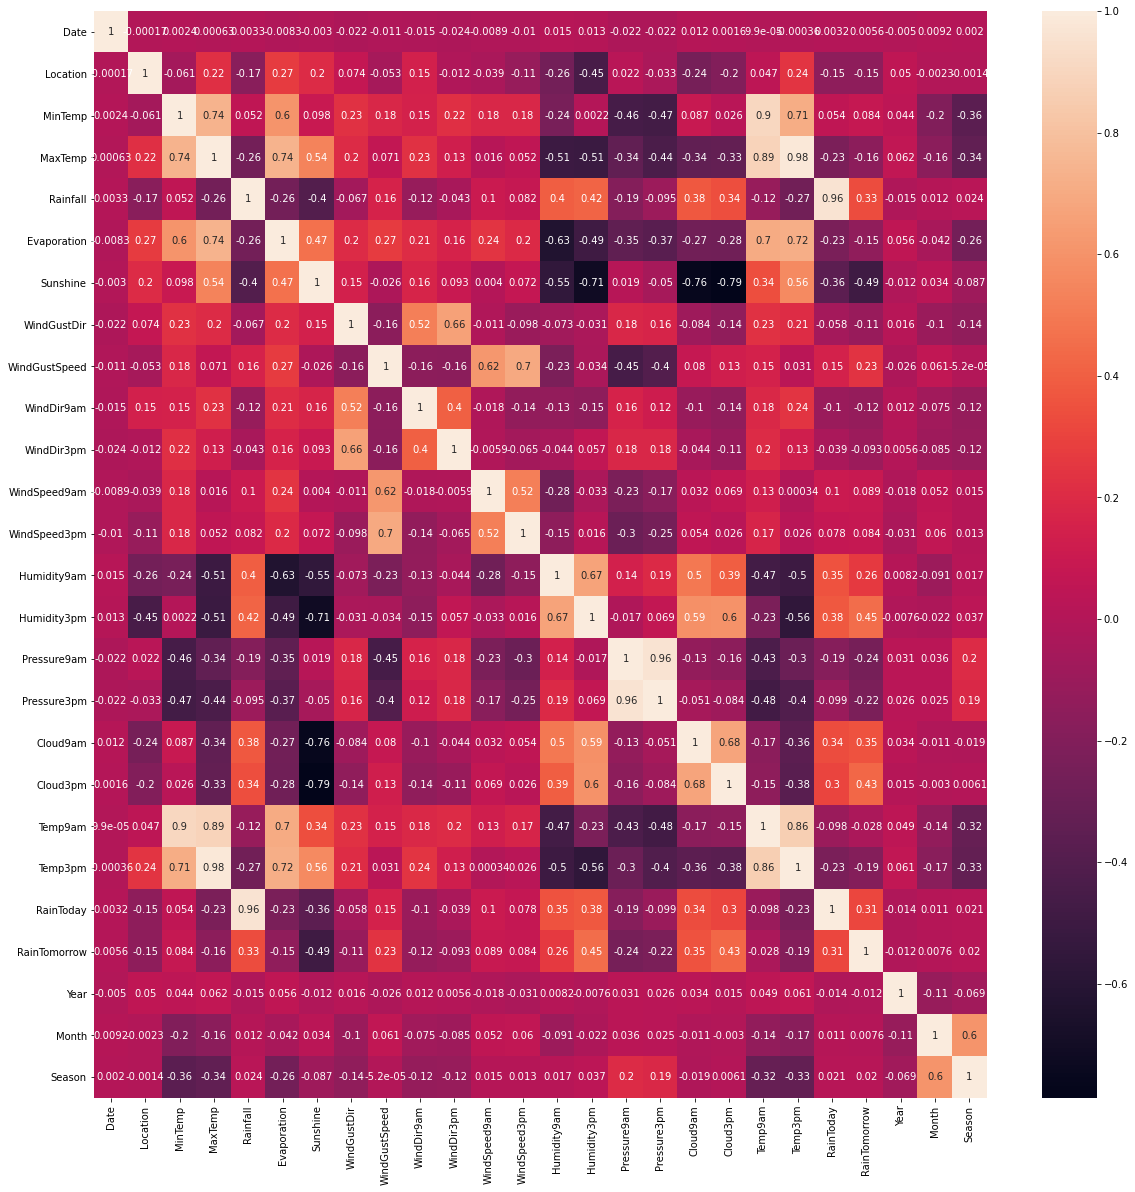

In [23]:
# plotting correlation

plt.figure(figsize=(20, 20))
corr_matrix = df2.corr()
sns.heatmap(corr_matrix, annot=True)

In [24]:
# correlation


def correlation(df, threshold):
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return list(col_corr)


correlation(df2, 0.85)

['Temp3pm', 'Pressure3pm', 'Temp9am', 'RainToday']

<AxesSubplot:>

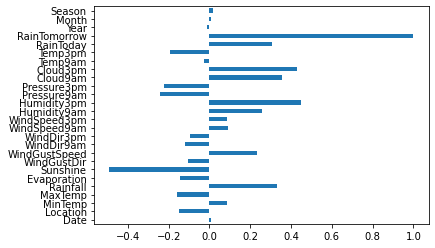

In [25]:
#pairwise correlation with target column

df2.corrwith(df2['RainTomorrow']).plot(kind='barh')

In [26]:
# removing correlated features

df3 = df2.drop(labels=['Temp3pm', 'Pressure3pm', 'Temp9am', 'Rainfall'],
               axis=1)

In [27]:
# save data

df3.to_csv('preprocessed_2.csv', index=False)